In [162]:
import pandas as pd
import numpy as np 
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

In [163]:
Cerels=pd.read_csv("Cereals/cereals.csv")

In [164]:
Cerels

,name,mfr,type,calories,protein,fat,sodium,fiber,carbo,sugars,potass,vitamins,shelf,weight,cups,rating
0,100% Bran,N,C,70,4,1,130,10.00,5.00,6,280,25,3,1.00,0.33,68.40
1,100% Natural Bran,Q,C,120,3,5,15,2.00,8.00,8,135,0,3,1.00,1.00,33.98
2,All-Bran,K,C,70,4,1,260,9.00,7.00,5,320,25,3,1.00,0.33,59.43
3,All-Bran with Extra Fiber,K,C,50,4,0,140,14.00,8.00,0,330,25,3,1.00,0.50,93.70
4,Almond Delight,R,C,110,2,2,200,1.00,14.00,8,-1,25,3,1.00,0.75,34.38
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
72,Triples,G,C,110,2,1,250,0.00,21.00,3,60,25,3,1.00,0.75,39.11
73,Trix,G,C,110,1,1,140,0.00,13.00,12,25,25,2,1.00,1.00,27.75
74,Wheat Chex,R,C,100,3,1,230,3.00,17.00,3,115,25,1,1.00,0.67,49.79
75,Wheaties,G,C,100,3,1,200,3.00,17.00,3,110,25,1,1.00,1.00,51.59


In [165]:
Cerels.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 77 entries, 0 to 76
Data columns (total 16 columns):
name        77 non-null object
mfr         77 non-null object
type        77 non-null object
calories    77 non-null int64
protein     77 non-null int64
fat         77 non-null int64
sodium      77 non-null int64
fiber       77 non-null float64
carbo       77 non-null float64
sugars      77 non-null int64
potass      77 non-null int64
vitamins    77 non-null int64
shelf       77 non-null int64
weight      77 non-null float64
cups        77 non-null float64
rating      77 non-null float64
dtypes: float64(5), int64(8), object(3)
memory usage: 9.8+ KB


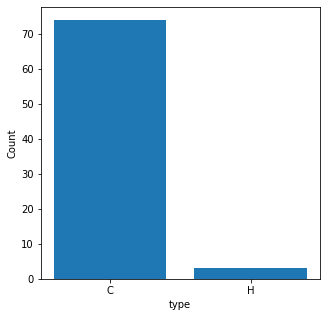

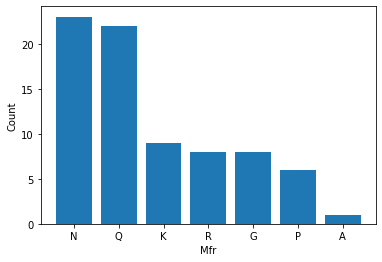

In [166]:
plt.figure(figsize=(5,5))
plt.bar(Cerels.type.unique(),Cerels.type.value_counts())
plt.xlabel("type")
plt.ylabel("Count")
plt.show()
plt.bar(Cerels.mfr.unique(),Cerels.mfr.value_counts())
plt.xlabel("Mfr")
plt.ylabel("Count")
plt.show()

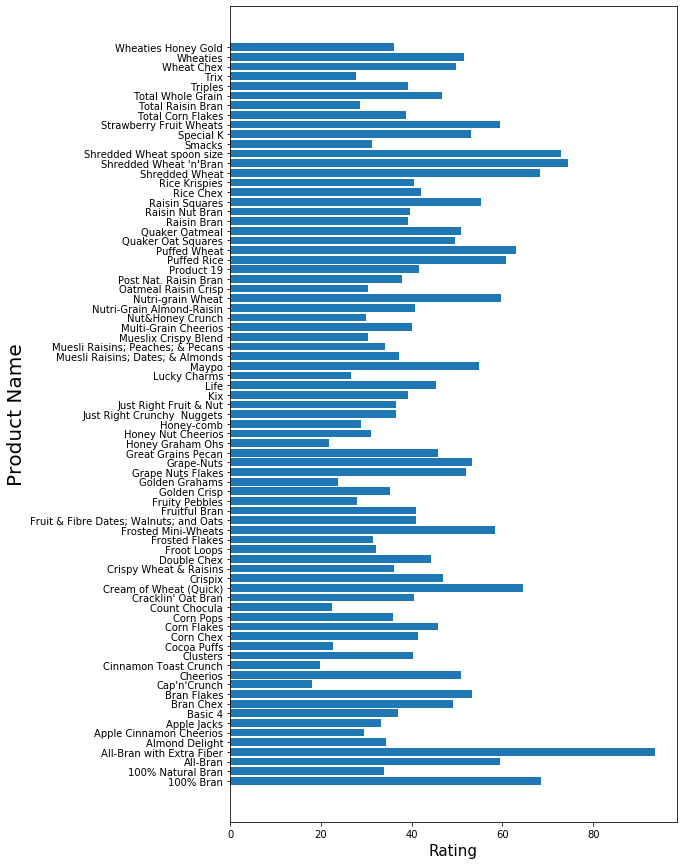

In [167]:
plt.figure(figsize=(8,15))
plt.barh(Cerels.name.unique(),Cerels.rating)
plt.ylabel("Product Name",fontsize=20)
plt.xlabel("Rating",fontsize=15)
plt.show()

In [168]:
Cerels.isnull().sum()

name        0
mfr         0
type        0
calories    0
protein     0
fat         0
sodium      0
fiber       0
carbo       0
sugars      0
potass      0
vitamins    0
shelf       0
weight      0
cups        0
rating      0
dtype: int64

In [169]:
Cerels=Cerels.drop("name",axis=1)

In [170]:
Cerels.head()

,mfr,type,calories,protein,fat,sodium,fiber,carbo,sugars,potass,vitamins,shelf,weight,cups,rating
0,N,C,70,4,1,130,10.00,5.00,6,280,25,3,1.00,0.33,68.40
1,Q,C,120,3,5,15,2.00,8.00,8,135,0,3,1.00,1.00,33.98
2,K,C,70,4,1,260,9.00,7.00,5,320,25,3,1.00,0.33,59.43
3,K,C,50,4,0,140,14.00,8.00,0,330,25,3,1.00,0.50,93.70
4,R,C,110,2,2,200,1.00,14.00,8,-1,25,3,1.00,0.75,34.38


In [171]:
Cerels=pd.get_dummies(Cerels,drop_first=True)

In [172]:
Cerels.head()

,calories,protein,fat,sodium,fiber,carbo,sugars,potass,vitamins,shelf,weight,cups,rating,mfr_G,mfr_K,mfr_N,mfr_P,mfr_Q,mfr_R,type_H
0,70,4,1,130,10.00,5.00,6,280,25,3,1.00,0.33,68.40,0,0,1,0,0,0,0
1,120,3,5,15,2.00,8.00,8,135,0,3,1.00,1.00,33.98,0,0,0,0,1,0,0
2,70,4,1,260,9.00,7.00,5,320,25,3,1.00,0.33,59.43,0,1,0,0,0,0,0
3,50,4,0,140,14.00,8.00,0,330,25,3,1.00,0.50,93.70,0,1,0,0,0,0,0
4,110,2,2,200,1.00,14.00,8,-1,25,3,1.00,0.75,34.38,0,0,0,0,0,1,0


In [173]:
col=Cerels.columns
x_col=set(col)-set({"rating"})
x=Cerels[x_col].values
y=Cerels.rating.values

In [174]:
sc=StandardScaler()
x=sc.fit_transform(x)
X_train,X_test,Y_train,Y_test=train_test_split(x,y,test_size=0.3,random_state=0)

In [175]:
from lazypredict.Supervised import LazyRegressor
clf = LazyRegressor(verbose=0,ignore_warnings=True, custom_metric=None)
models,predictions = clf.fit(X_train, X_test, Y_train, Y_test)

 66%|█████████████████████████████████████████████████████▉                            | 25/38 [00:00<00:00, 49.24it/s]

[15:20:32] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


100%|██████████████████████████████████████████████████████████████████████████████████| 38/38 [00:00<00:00, 58.98it/s]


In [176]:
predictions

,R-Squared,RMSE,Time Taken
Model,,,
RANSACRegressor,1.00,0.00,0.01
LinearRegression,1.00,0.00,0.01
TransformedTargetRegressor,1.00,0.00,0.01
LarsCV,1.00,0.00,0.03
Lars,1.00,0.00,0.01
LassoLarsCV,1.00,0.00,0.02
BayesianRidge,1.00,0.00,0.00
HuberRegressor,1.00,0.00,0.05
PassiveAggressiveRegressor,1.00,0.15,0.01


In [182]:
from sklearn.linear_model import LinearRegression
reg = LinearRegression().fit(X_train, Y_train)
print("Train Accuracy:",reg.score(X_train, Y_train)*100)
print("Test Accuracy:",reg.score(X_test,Y_test)*100)

Train Accuracy: 99.99999999999997
Test Accuracy: 99.99999999999993


In [183]:
from sklearn.ensemble import RandomForestRegressor
regr = RandomForestRegressor(max_depth=500,n_estimators=50)
regr.fit(X_train, Y_train)
print("Train Accuracy:",regr.score(X_train, Y_train)*100)
print("Test Accuracy:",regr.score(X_test,Y_test)*100)

Train Accuracy: 98.46191614998446
Test Accuracy: 59.26054519342963


In [184]:
import sklearn
regressor = sklearn.linear_model.Lasso(alpha = 0.1)
regressor.fit(X_train, Y_train)
print("Train Accuracy:",regressor.score(X_train, Y_train)*100)
print("Test Accuracy:",regressor.score(X_test, Y_test)*100)

Train Accuracy: 99.71510843038484
Test Accuracy: 98.38891436665143
